# Example of calculation of a stable geotherm

Copyright 2020 Marco A. Lopez-Sanchez

Mozilla Public License 2.0: https://www.mozilla.org/en-US/MPL/2.0/

> **Goal of the notebook**: Estimate and plot a steady-state thermal gradient for the continental lithosphere considering a two-layer model (crust vs lithospheric mantle) using the Turcotte and Schubert (1982) model.

In [1]:
# import the required Python scientific libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 'large'

TODO -> Flow laws

Let's make some assumptions first: 
- the geotherm is in **steady state** and thus temperature only vary as a function of depth $(z)$.
- Heat is transferred by conduction in the lithosphere.
- The temperature gradient with depth $(\frac{dT}{dz})$ depends on heat conduction plus the heat produced due to radioactive decay.
- Radioactive heat production in the crust and the mantle is independent of depth.

Taking this assumptions, Turcotte and Schubert (1982) proposed an analytical solution of the heat equation that have three terms

$T_z = T_{z0} + \frac{J_q}{K}(z - z_0) - \frac{A_0}{2K}(z - z_0)^2  $

where $T_z$ is the temperature variation with depth, $T_{z0}$, is the temperature on the surface of the Earth, $J_q$ is the average heat flux, $K$ the coefficient of thermal conductivity, and $A_0$ the average heat productivity. The second and the third terms of the equation account for the heat conduction and the heat production due to radioactivity, respectively. This equation allow us to estimate the temperature gradient from the surface temperature if we know the parameters $J_q$, $K$, and $A_0$.

Now, let's write within a Python function named ``turcotte_schubert_model``:

In [2]:
def turcotte_schubert_model(z0, z, T0, Jq, A, K):
    """ Apply the equation (model) of Turcotte and Schubert (1982) (ts) to estimate
    a steady-state geotherm (i.e. the T at a given depth)

    Parameters (all positive scalars)
    ----------
    z0 : upper depth limit [km]
    z : lower depth limit [km]
    T0 : temperature at the upper depth limit [K]
    Jq : average heat flux [mW m**-2]
    A : average heat productivity [microW m**-3]
    K : coefficient of thermal conductivity [W m**-1 K**-1]

    Assumptions
    -----------
    TODO

    Returns
    -------
    The temperature in K, a floating point number
    """
    
    # check for positive values
    if np.any([z0, T0, Jq, A, K]) < 0 and np.any(z) < 0:
        print('all parameters must be positive scalars')

    return T0 + ((Jq / K) * (z - z0)) - ((A / (2 * K)) * (z - z0)**2)

Now let set the boundary conditions for the model.

In [3]:
moho = 38.8 # Continental crust thickness [m], average from Hacker et al. (2015)
Lab = 81  # Lithosphere-asthenosphere boundary (Lab) [m], average beneath tectonically altered regions (Rychert and Shearer, 2009)
T_init = 7.5  # surface T at the KTB superdeep borehole

# Average heat parameters for the crust and the mantle
Jq_crust = 65  # Average heat flux [mW m**-2] from Jaupar and Mareschal (2007)
A_crust = 0.97  # Average rate of radiogenic heat production [microW m**-3] from Huang et al. (2013)
K_crust = 2.51  # Coefficient of thermal conductivity [W m**-1 K**-1] from Sclater et al. (1980)

Jq_mantle = 34  # from Sclater et al. (1980)
A_mantle = 0.01  # from Sclater et al. (1980)
K_mantle = 3.35  # in peridotite at room T (Sclater et al., 1980)

Now we need to generate an array with the depths...TODO

In [4]:
# generate a linear spaced array of depths every 10 m from 0 to the depth of the
# lithosphere-asthenosphere boundary (Lab)
depths = np.linspace(start=0, stop=Lab, num=8100)

In [5]:
T_crust = turcotte_schubert_model(0,
                                  depths[depths <= moho],
                                  T_init,
                                  Jq_crust,
                                  A_crust,
                                  K_crust)

Text(0.5, 0, 'Depth (km)')

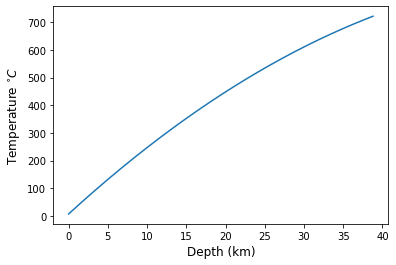

In [6]:
# plot depth vs temperature
plt.plot(depths[depths <= moho], T_crust, label='stable geotherm')
plt.ylabel('Temperature $^{\circ}C$')
plt.xlabel('Depth (km)')

In [7]:
# get the closest depth to the Moho
new_ref_frame = depths[depths <= moho][-1]

# Estimate the T gradient
T_mantle = turcotte_schubert_model(new_ref_frame,  # the depth of the Moho (i.e. where the mantle begins)
                                   depths[depths > moho],
                                   T_crust[-1],  # take the T at the Moho as T0
                                   Jq_mantle,
                                   A_mantle,
                                   K_mantle)

# Stack the two arrays in sequence horizontally 
T_values = np.hstack((T_crust, T_mantle))

Text(0.5, 0, 'Depth (km)')

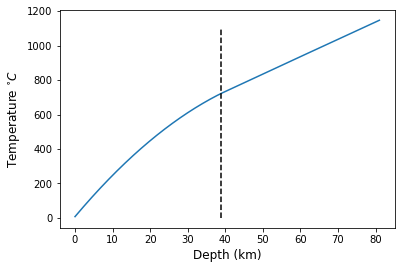

In [8]:
plt.plot(depths, T_values)
plt.plot([moho, moho], [0, 1100], color='black', linestyle='dashed')
plt.ylabel('Temperature $^{\circ}C$')
plt.xlabel('Depth (km)')

Now, we